# Dataset: Black Friday Sales

### Objective
To perform EDA on Black Friday Sales dataset given below to extract key business insights

### Dataset Overview
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital-status, city-type, stay-in-current-city), product details (product-id and product-category) and Total purchase amount from last month.

Now, they want us to analyse the data to find valuable insights from it.

**Creating a spark session and checking the dataset**

In [ ]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [ ]:
%fs ls /FileStore/tables/

path,name,size,modificationTime
dbfs:/FileStore/tables/Jio/,Jio/,0,0
dbfs:/FileStore/tables/jio/,jio/,0,0
dbfs:/FileStore/tables/jio2025/,jio2025/,0,0
dbfs:/FileStore/tables/personal/,personal/,0,0
dbfs:/FileStore/tables/rossmansales.csv,rossmansales.csv,38057952,1719904757000
dbfs:/FileStore/tables/rossmanstores.csv,rossmanstores.csv,45010,1719904728000
dbfs:/FileStore/tables/sample_tweets_excel.xlsx,sample_tweets_excel.xlsx,7274063,1718133429000
dbfs:/FileStore/tables/train.csv,train.csv,25525678,1721483855000


In [ ]:
%fs head /FileStore/tables/train.csv


[Truncated to first 65536 bytes]
User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1000001,P00069042,F,0-17,10,A,2,0,3,,,8370
1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
1000001,P00087842,F,0-17,10,A,2,0,12,,,1422
1000001,P00085442,F,0-17,10,A,2,0,12,14,,1057
1000002,P00285442,M,55+,16,C,4+,0,8,,,7969
1000003,P00193542,M,26-35,15,A,3,0,1,2,,15227
1000004,P00184942,M,46-50,7,B,2,1,1,8,17,19215
1000004,P00346142,M,46-50,7,B,2,1,1,15,,15854
1000004,P0097242,M,46-50,7,B,2,1,1,16,,15686
1000005,P00274942,M,26-35,20,A,1,1,8,,,7871
1000005,P00251242,M,26-35,20,A,1,1,5,11,,5254
1000005,P00014542,M,26-35,20,A,1,1,8,,,3957
1000005,P00031342,M,26-35,20,A,1,1,8,,,6073
1000005,P00145042,M,26-35,20,A,1,1,1,2,5,15665
1000006,P00231342,F,51-55,9,A,1,0,5,8,14,5378
1000006,P00190242,F,51-55,9,A,1,0,4,5,,2079
1000006,P0096642,F,51-55,9,A,1,0,2,3,4,13055
1000006,P00058442,F,51-55,9,A,1,0,5,14,,8851
1000007,P00036842,M,36-45,1,B,1,1,1,14,16,11788
1000008,P00249542,M,26-35,12,C,4+,1,1,5,15,19614
1000008,P00220442,M,26-35,12,C,4+,1,5,14,,8584
1000008,P00156442,M,26-35,12,C,4+,1,8,,,9872
1000008,P00213742,M,26-35,12,C,4+,1,8,,,9743
1000008,P00214442,M,26-35,12,C,4+,1,8,,,5982
1000008,P00303442,M,26-35,12,C,4+,1,1,8,14,11927
1000009,P00135742,M,26-35,17,C,0,0,6,8,,16662
1000009,P00039942,M,26-35,17,C,0,0,8,,,5887
1000009,P00161442,M,26-35,17,C,0,0,5,14,,6973
1000009,P00078742,M,26-35,17,C,0,0,5,8,14,5391
1000010,P00085942,F,36-45,1,B,4+,1,2,4,8,16352
1000010,P00118742,F,36-45,1,B,4+,1,5,11,,8886
1000010,P00297942,F,36-45,1,B,4+,1,8,,,5875
1000010,P00266842,F,36-45,1,B,4+,1,5,,,8854
1000010,P00058342,F,36-45,1,B,4+,1,3,4,,10946
1000010,P00032442,F,36-45,1,B,4+,1,5,,,5152
1000010,P00105942,F,36-45,1,B,4+,1,5,,,7089
1000010,P00182642,F,36-45,1,B,4+,1,2,4,9,12909
1000010,P00186942,F,36-45,1,B,4+,1,5,12,,8770
1000010,P00155442,F,36-45,1,B,4+,1,1,11,15,15212
1000010,P00221342,F,36-45,1,B,4+,1,1,2,5,15705
1000010,P00087242,F,36-45,1,B,4+,1,14,,,7947
1000010,P00111142,F,36-45,1,B,4+,1,1,15,16,18963
1000010,P00259342,F,36-45,1,B,4+,1,5,9,,8718
1000010,P0094542,F,36-45,1,B,4+,1,2,4,9,16406
1000010,P00148642,F,36-45,1,B,4+,1,6,10,13,12642
1000010,P00312142,F,36-45,1,B,4+,1,8,,,10007
1000010,P00113242,F,36-45,1,B,4+,1,1,6,8,11562
1000011,P00192642,F,26-35,1,C,1,0,8,17,,6171
1000011,P00110842,F,26-35,1,C,1,0,1,2,5,19327
1000011,P00189642,F,26-35,1,C,1,0,8,13,,8027
1000012,P00304242,M,26-35,12,C,2,0,1,6,,15246
1000012,P00365242,M,26-35,12,C,2,0,5,8,,6865
1000013,P00129542,M,46-50,1,C,3,1,8,14,,5839
1000013,P00140742,M,46-50,1,C,3,1,1,15,,15912
1000013,P00182342,M,46-50,1,C,3,1,1,5,6,12107
1000014,P00276642,M,36-45,0,C,0,0,8,11,,5848
1000015,P00334242,M,26-35,7,A,1,0,1,8,,19653
1000015,P00247542,M,26-35,7,A,1,0,8,16,,5958
1000015,P00338442,M,26-35,7,A,1,0,1,16,,11415
1000015,P00275142,M,26-35,7,A,1,0,5,8,,5380
1000015,P00333042,M,26-35,7,A,1,0,5,8,,3594
1000015,P00166242,M,26-35,7,A,1,0,8,,,4209
1000015,P00161942,M,26-35,7,A,1,0,5,8,,5407
1000015,P00348242,M,26-35,7,A,1,0,8,,,7803
1000015,P00042142,M,26-35,7,A,1,0,1,2,6,11458
1000016,P00244242,F,36-45,0,C,0,1,1,2,15,11755
1000016,P00217742,F,36-45,0,C,0,1,5,14,,8702
1000017,P00019342,M,51-55,1,C,0,0,1,6,15,15872
1000017,P00100642,M,51-55,1,C,0,0,5,15,,8609
1000017,P00073842,M,51-55,1,C,0,0,1,15,17,15172
1000018,P00366542,F,18-25,3,B,3,0,5,,,1780
1000018,P00190742,F,18-25,3,B,3,0,3,4,9,10754
1000018,P00151842,F,18-25,3,B,3,0,4,8,9,2802
1000018,P00112642,F,18-25,3,B,3,0,1,2,5,19473
1000018,P00118442,F,18-25,3,B,3,0,1,2,,19672
1000018,P00034442,F,18-25,3,B,3,0,1,14,16,19313
1000018,P00222242,F,18-25,3,B,3,0,1,2,13,15182
1000018,P00118342,F,18-25,3,B,3,0,2,3,15,15985
1000018,P00324742,F,18-25,3,B,3,0,2,9,14,16454
1000018,P00190042,F,18-25,3,B,3,0,3,4,5,13551
1000018,P0094142,F,18-25,3,B,3,0,4,5,,697
1000018,P00138542,F,18-25,

###Dataset Description
The dataset consists of the following columns:

1. User_ID: Unique identifier for each user.
2. Product_ID: Unique identifier for each product.
3. Gender: Gender of the user (F for female, M for male).
4. Age: Age group of the user (e.g., 0-17, 18-25, etc.).
5. Occupation: Occupation code for the user.
6. City_Category: Category of the city (A, B, C).
7. Stay_In_Current_City_Years: Number of years the user has stayed in the current city.
8. Marital_Status: Marital status of the user (0 for single, 1 for married).
9. Product_Category_1: Category of the product.
10. Product_Category_2: Category of the product.
11. Product_Category_3: Category of the product.
12. Purchase: Purchase amount.

**Defining the schema of the dataset and loading it**

In [ ]:
from pyspark.sql.types import *

# Define the custom schema
schema = StructType([
    StructField("User_ID", StringType(), True),
    StructField("Product_ID", StringType(), True),
    StructField("Gender", StringType(), True),
    StructField("Age", StringType(), True),
    StructField("Occupation", StringType(), True),
    StructField("City_Category", StringType(), True),
    StructField("Stay_In_Current_City_Years", StringType(), True),
    StructField("Marital_Status", StringType(), True),
    StructField("Product_Category_1", StringType(), True),
    StructField("Product_Category_2", StringType(), True),
    StructField("Product_Category_3", StringType(), True),
    StructField("Purchase", FloatType(), True)
])

In [ ]:
# Load data into a Spark DataFrame using the custom schema
file_path = "/FileStore/tables/train.csv"

df = (spark.read
  .format("csv")
  .option("mode", "PERMISSIVE")
  .option("header", "true")
  .schema(schema)
  .load(file_path)
)

# Display the schema
df.printSchema()

root
 |-- User_ID: string (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Product_Category_1: string (nullable = true)
 |-- Product_Category_2: string (nullable = true)
 |-- Product_Category_3: string (nullable = true)
 |-- Purchase: float (nullable = true)



In [ ]:
# Display the dataframe
df.show(5)

+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|1000001| P00069042|     F|0-17|        10|            A|                         2|             0|                 3|              null|              null|  8370.0|
|1000001| P00248942|     F|0-17|        10|            A|                         2|             0|                 1|                 6|                14| 15200.0|
|1000001| P00087842|     F|0-17|        10|            A|                         2|             0|                12|              null|              null|  1422.0|
|100

**Storing the loaded dataset into a Hive table**

In [ ]:
# Remove the existing directory
dbutils.fs.rm("dbfs:/user/hive/warehouse/black_friday_sales", recurse=True)

# Create the new table
df.write.mode("overwrite").saveAsTable("black_friday_sales", format='parquet')

In [ ]:
%sql

describe formatted black_friday_sales

col_name,data_type,comment
User_ID,string,null
Product_ID,string,null
Gender,string,null
Age,string,null
Occupation,string,null
City_Category,string,null
Stay_In_Current_City_Years,string,null
Marital_Status,string,null
Product_Category_1,string,null
Product_Category_2,string,null


In [ ]:
df = spark.read.table("black_friday_sales")

In [ ]:
# Displaying the number of partitions in the dataset
df.rdd.getNumPartitions()

Out[8]: 7

In [ ]:
df.show(5)

+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|  Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|1001899| P00108542|     F|46-50|         6|            A|                         1|             1|                 5|                 8|                14|  6996.0|
|1001899| P00087342|     F|46-50|         6|            A|                         1|             1|                 5|                14|                16|  7170.0|
|1001899| P00106942|     F|46-50|         6|            A|                         1|             1|                 8|              null|              null|  7867.0

Display the number of rows and columns in the dataset

In [ ]:
# Get the number of rows
num_rows = df.count()

# Get the number of columns
num_columns = len(df.columns)

# Combine to get the shape
shape = (num_rows, num_columns)

# Print the shape
print(shape)


(550068, 12)


### Data Cleaning

**Describing the dataset**

In [ ]:
# Describe the data
data_description = df.describe()

# Show the description
print("Data Description:")
data_description.show()

Data Description:
+-------+------------------+----------+------+------+-----------------+-------------+--------------------------+-------------------+------------------+------------------+------------------+-----------------+
|summary|           User_ID|Product_ID|Gender|   Age|       Occupation|City_Category|Stay_In_Current_City_Years|     Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|         Purchase|
+-------+------------------+----------+------+------+-----------------+-------------+--------------------------+-------------------+------------------+------------------+------------------+-----------------+
|  count|            550068|    550068|550068|550068|           550068|       550068|                    550068|             550068|            550068|            376430|            166821|           550068|
|   mean|1003028.8424013031|      null|  null|  null|8.076706879876669|         null|         1.468494139793958|0.40965298835780306| 5.404270017525106

**Handling missing values**

In [ ]:
from pyspark.sql.functions import col, sum as spark_sum

# Check for missing values
missing_values = df.select([spark_sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])

# Show the missing values
print("Missing Values:")
missing_values.show()

Missing Values:
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|      0|         0|     0|  0|         0|            0|                         0|             0|                 0|            173638|            383247|       0|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+



Displaying unique product categories

In [ ]:
# Get unique values of the 'Product_Category_1' column
unique_values = df.select("Product_Category_1").distinct().collect()

# Convert to a list
unique_values_list = [row['Product_Category_1'] for row in unique_values]

# Print the unique values
print("Unique values in Product_Category_1:", unique_values_list)

Unique values in Product_Category_1: ['7', '15', '11', '3', '8', '16', '5', '18', '17', '6', '9', '1', '10', '4', '12', '13', '14', '2', '19', '20']


In [ ]:
# Fill NaNs in Product_Category_2 and Product_Category_3 with 0
df = df.fillna({'Product_Category_2': 0, 'Product_Category_3': 0})

In [ ]:
# Check for missing values
missing_values = df.select([spark_sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])

# Show the missing values
print("Missing Values:")
missing_values.show()

Missing Values:
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|      0|         0|     0|  0|         0|            0|                         0|             0|                 0|                 0|                 0|       0|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+



**Removing duplicates**

In [ ]:
# Remove duplicates
df = df.dropDuplicates()

In [ ]:
# Get the number of rows
num_rows = df.count()

# Get the number of columns
num_columns = len(df.columns)

# Combine to get the shape
shape = (num_rows, num_columns)

# Print the shape
print(shape)

(550068, 12)


**Outlier detection and handling**

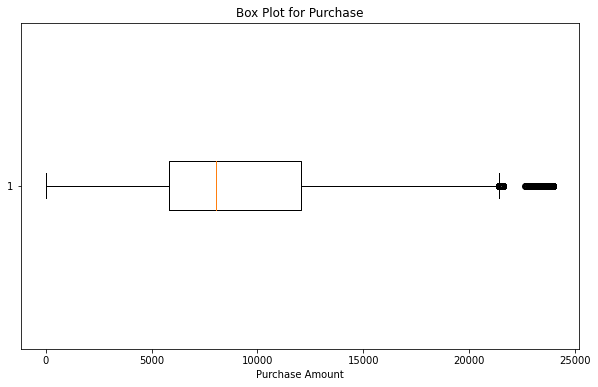

In [ ]:
import matplotlib.pyplot as plt

# Collect the 'Purchase' column data into a list
purchase_data = df.select('Purchase').rdd.flatMap(lambda x: x).collect()

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(purchase_data, vert=False)
plt.title('Box Plot for Purchase')
plt.xlabel('Purchase Amount')
plt.show()


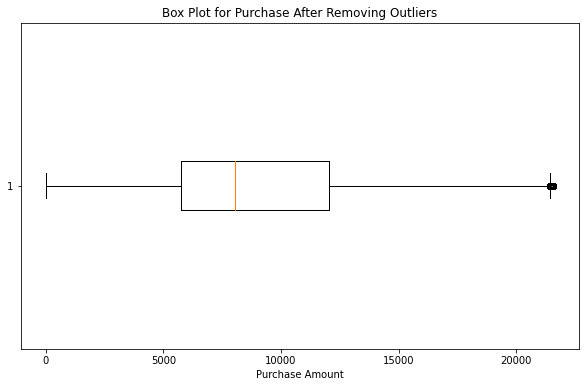

In [ ]:
from pyspark.sql.functions import expr, percentile_approx

# Step 1: Compute Quantiles and IQR
Q1 = df.approxQuantile('Purchase', [0.25], 0.01)[0]
Q3 = df.approxQuantile('Purchase', [0.75], 0.01)[0]
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Remove Outliers
df = df.filter((col('Purchase') >= lower_bound) & (col('Purchase') <= upper_bound))

# Step 3: Collect data for plotting
pdf_filtered = df.select('Purchase').toPandas()

# Plot the Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(pdf_filtered['Purchase'], vert=False)
plt.title('Box Plot for Purchase After Removing Outliers')
plt.xlabel('Purchase Amount')
plt.show()


**Data standardization**

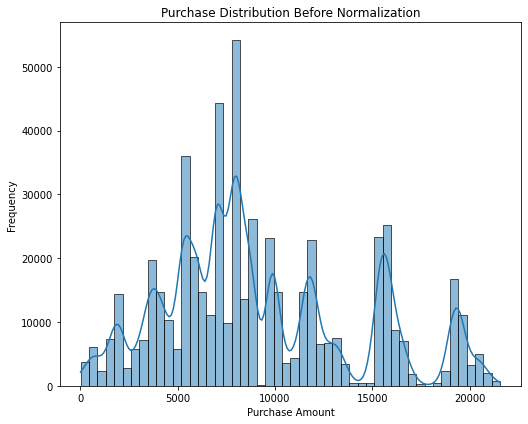

In [ ]:
import pandas as pd
import seaborn as sns

# Collect data from Spark DataFrame to Pandas DataFrame
pdf = df.select('Purchase').toPandas()

# Step 2: Visualize the Original Distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(pdf['Purchase'], bins=50, kde=True)
plt.title('Purchase Distribution Before Normalization')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


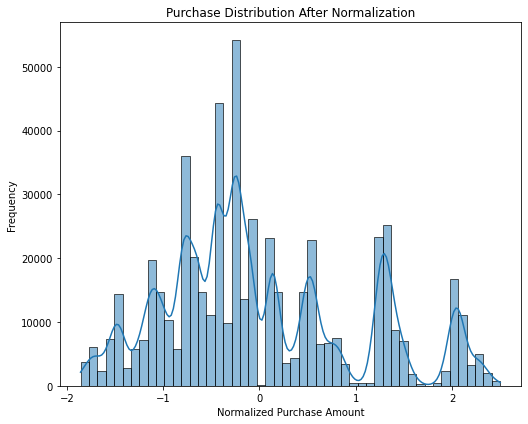

In [ ]:
from pyspark.sql.functions import mean, stddev

# Calculate mean and standard deviation for normalization
stats = df.select(mean(col('Purchase')).alias('mean'), stddev(col('Purchase')).alias('stddev')).collect()
purchase_mean = stats[0]['mean']
purchase_std = stats[0]['stddev']

# Normalize the Purchase column
df = df.withColumn('Purchase_normalized', (col('Purchase') - purchase_mean) / purchase_std)

# Collect normalized data to Pandas DataFrame
pdf_normalized = df.select('Purchase_normalized').toPandas()

# Visualize the Normalized Distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
sns.histplot(pdf_normalized['Purchase_normalized'], bins=50, kde=True)
plt.title('Purchase Distribution After Normalization')
plt.xlabel('Normalized Purchase Amount')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


### Data Visualizations

**1. Age, gender, marital status and city category vs purchase column**

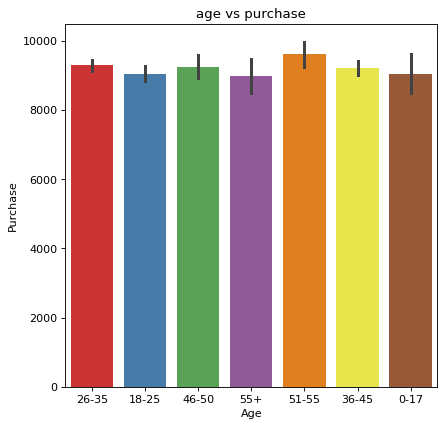

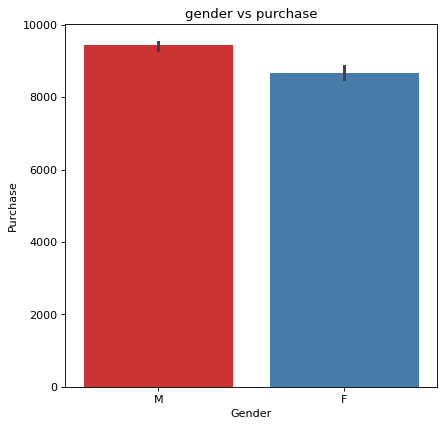

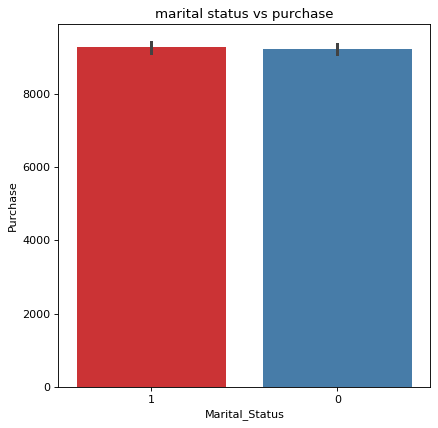

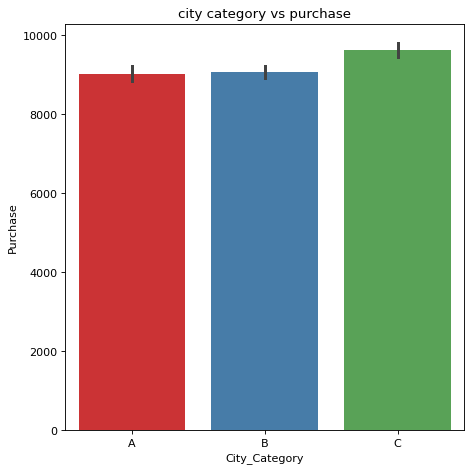

In [ ]:
# Sample a fraction of rows from the Spark DataFrame
fraction = 10000 / df.count()  # Adjust fraction based on total count
df_sampled = df.sample(withReplacement=False, fraction=fraction, seed=42)

# Convert the sampled Spark DataFrame to Pandas DataFrame
pdf = df_sampled.toPandas()

# Age vs purchased
plt.figure(figsize=(6,6),dpi=80)
plt.title('age vs purchase')
sns.barplot(x='Age',y='Purchase',data=pdf,palette='Set1')

# Gender vs purchased
plt.figure(figsize=(6,6),dpi=80)
plt.title('gender vs purchase')
sns.barplot(x='Gender',y='Purchase',data=pdf,palette='Set1')

# Marital Status vs purchased
plt.figure(figsize=(6,6),dpi=80)
plt.title('marital status vs purchase')
sns.barplot(x='Marital_Status',y='Purchase',data=pdf,palette='Set1')

# City category vs purchased
plt.figure(figsize=(6,6),dpi=80)
plt.title('city category vs purchase')
sns.barplot(x='City_Category',y='Purchase',data=pdf,palette='Set1')

plt.tight_layout()
plt.show()

**2. Visualizing the frequency of all the features in the dataset**

/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/databricks/python/

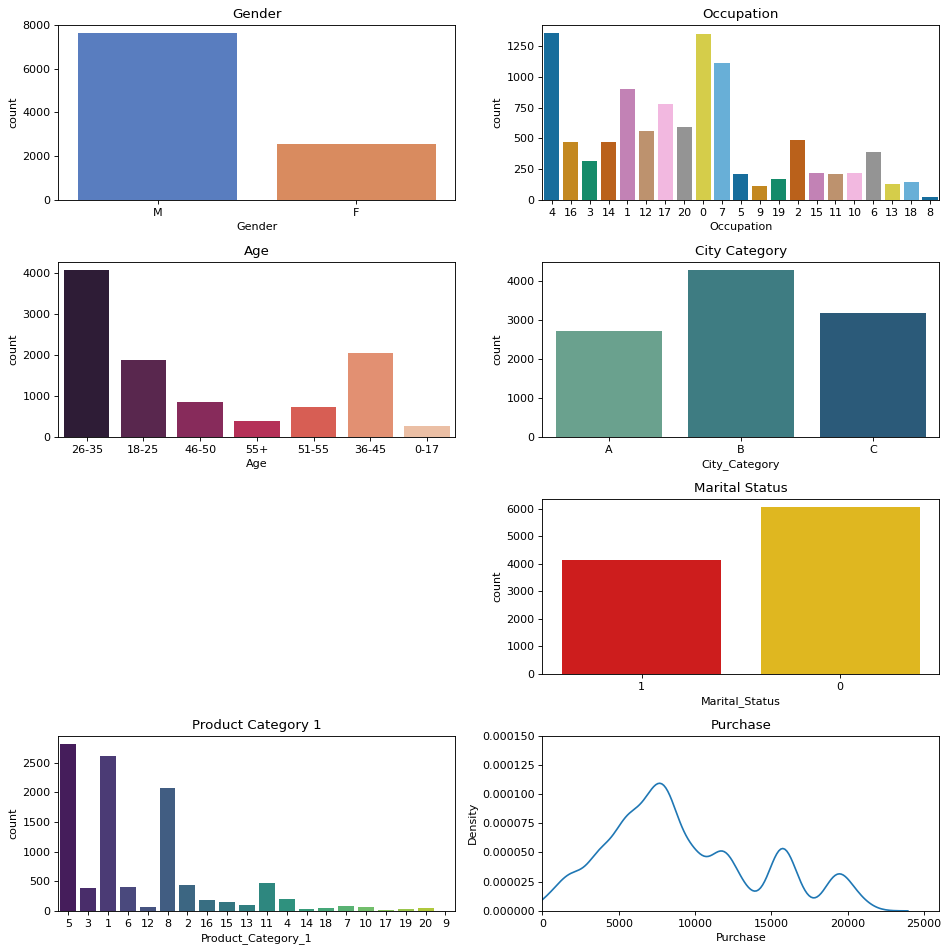

In [ ]:
# Visualizing individual column 
plt.figure(figsize=(12,12),dpi=80)
plt.subplot(4,2,1)
plt.title('Gender')
sns.countplot(x='Gender',data=pdf,palette='muted')

plt.subplot(4,2,3)
plt.title('Age')
sns.countplot(x='Age',data=pdf,palette='rocket')

plt.subplot(4,2,2)
plt.title('Occupation')
sns.countplot(pdf['Occupation'],palette='colorblind')

plt.subplot(4,2,4)
plt.title('City Category')
sns.countplot(pdf['City_Category'],palette='crest')

plt.subplot(4,2,6)
plt.title('Marital Status')
sns.countplot(pdf['Marital_Status'],palette='hot')

ax=plt.subplot(4,2,8)
plt.title('Purchase')
ax.set_ylim(0,0.00015)
ax.set_xlim(0,26000)
sns.kdeplot(pdf['Purchase'])

plt.subplot(4,2,7)
plt.title('Product Category 1')
sns.countplot(pdf['Product_Category_1'],palette='viridis')

plt.tight_layout()
plt.show()

### Business Insights

**1. Average Purchase Amount by Product Category**

Usefulness: Identifies which product categories generate the highest revenue on average.

Importance: Helps in prioritizing inventory management and marketing efforts towards high-value categories, optimizing stock levels, and creating targeted promotions.

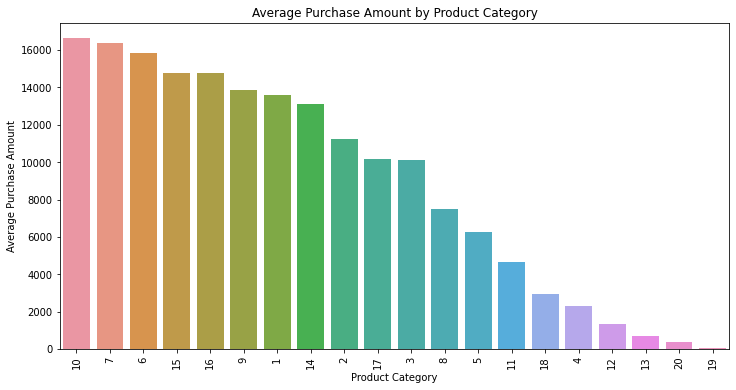

In [ ]:

# Create a temporary view for SparkSQL
df.createOrReplaceTempView("sales_data")

# Perform Analysis using SparkSQL
average_purchase_query = """
SELECT 
    Product_Category_1 AS Category,
    AVG(Purchase) AS Avg_Purchase
FROM 
    sales_data
GROUP BY 
    Product_Category_1
ORDER BY 
    Avg_Purchase DESC
"""

average_purchase_df = spark.sql(average_purchase_query)

# Convert to Pandas for visualization
average_purchase_pd = average_purchase_df.toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Avg_Purchase', data=average_purchase_pd)
plt.title('Average Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=90)
plt.show()


***Inferences:***

a. Categories with higher average purchase amounts indicate premium products (Category 10)

b. Categories with lower averages might represent more commonly purchased, lower-cost items (Category 19)

c. If a specific category shows a significantly higher average purchase amount, it indicates potential for premium pricing strategies or focused marketing efforts to highlight the value of these products

**2. Analysis of Product Popularity Across Different Age Groups**

Usefulness: Determines which products are most popular among different age groups.

Importance: Enables targeted marketing and personalized product recommendations based on age demographics, improving customer satisfaction and sales.

<Figure size 1008x576 with 0 Axes>

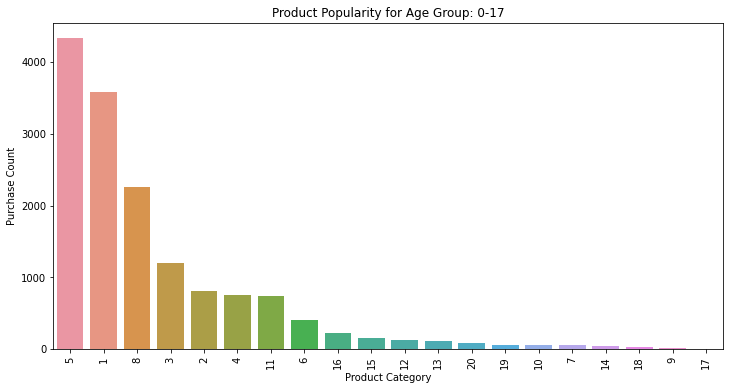

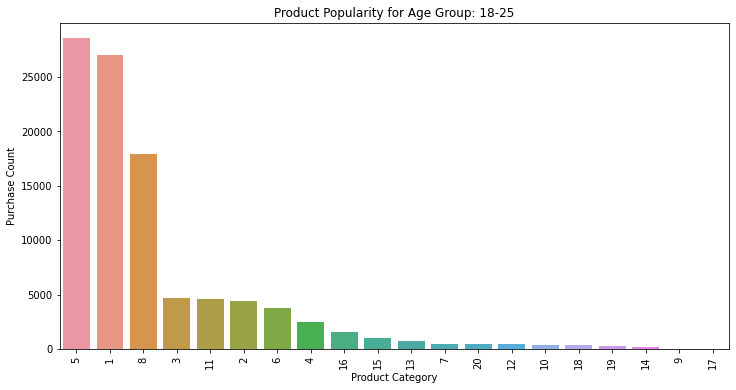

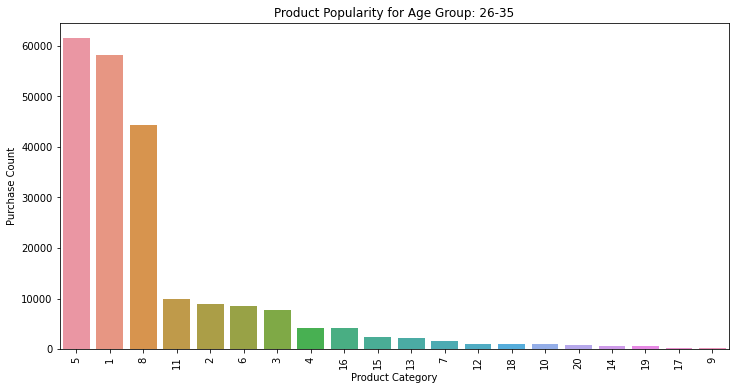

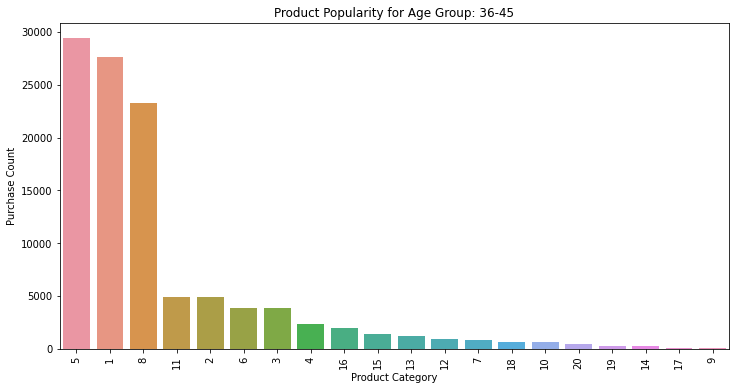

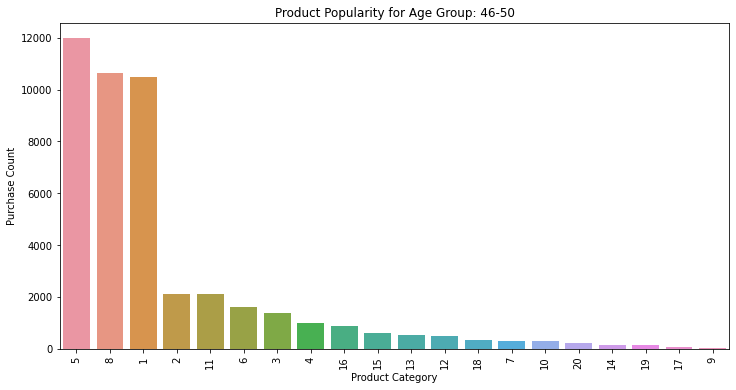

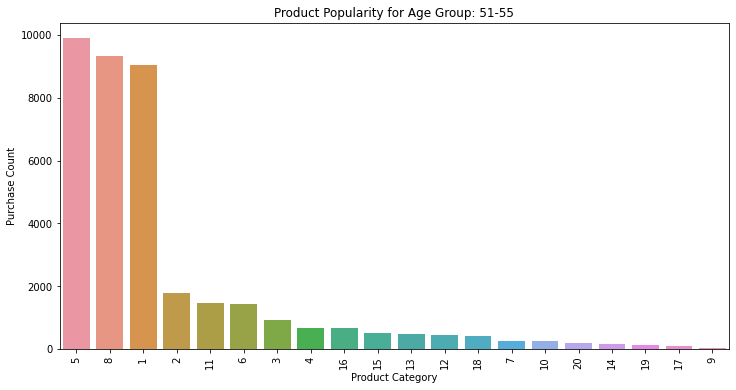

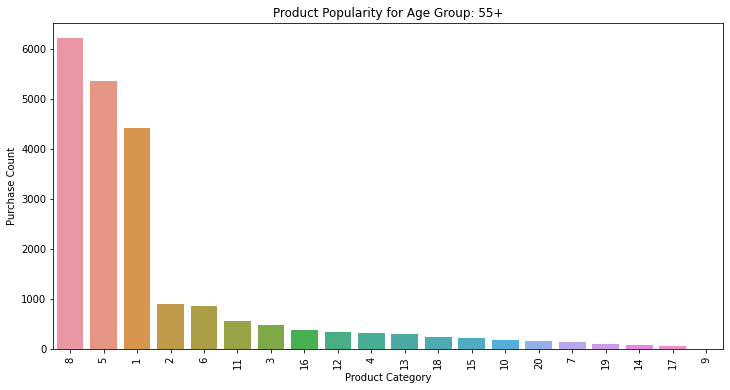

In [ ]:
# Perform Analysis using SparkSQL
product_popularity_query = """
SELECT 
    Age,
    Product_Category_1 AS Category,
    COUNT(Product_ID) AS Purchase_Count
FROM 
    sales_data
GROUP BY 
    Age, Product_Category_1
ORDER BY 
    Age, Purchase_Count DESC
"""

product_popularity_df = spark.sql(product_popularity_query)

# Convert to Pandas for visualization
product_popularity_pd = product_popularity_df.toPandas()

plt.figure(figsize=(14, 8))

# Plotting each age group's product category popularity
for age_group in product_popularity_pd['Age'].unique():
    plt.figure(figsize=(12, 6))
    age_group_data = product_popularity_pd[product_popularity_pd['Age'] == age_group]
    sns.barplot(x='Category', y='Purchase_Count', data=age_group_data)
    plt.title(f'Product Popularity for Age Group: {age_group}')
    plt.xlabel('Product Category')
    plt.ylabel('Purchase Count')
    plt.xticks(rotation=90)
    plt.show()

***Inferences:***

a. Understanding which age groups prefer certain products helps tailor marketing campaigns.

b. Helps in stock allocation based on demographic demand.

c. If younger age groups prefer certain categories, promotional efforts can be directed towards social media and digital channels (Category 5)

d. Older age groups preferring different categories might be reached more effectively through traditional marketing channels (Category 8)

**3. Product Performance and Inventory Management**

Usefulness: Assesses the sales performance of individual products.

Importance: Helps in identifying top-performing and underperforming products, optimizing inventory levels, reducing overstock and stockouts, and making informed procurement decisions.

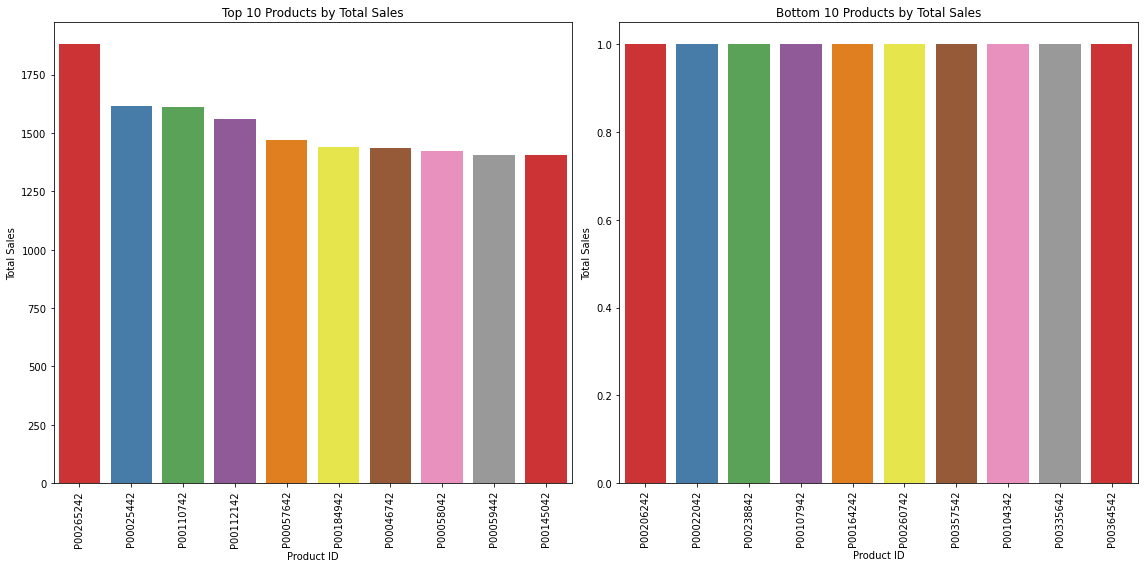

In [ ]:
from pyspark.sql.functions import sum as _sum, count as _count

# Define the function to compute product performance and inventory management
def product_performance_inventory(sdf):
    # Top products by total sales
    top_products = sdf.groupBy("Product_ID") \
                      .agg(_count("Product_ID").alias("Total_Sales"),
                           _sum("Purchase").alias("Total_Revenue")) \
                      .orderBy(col("Total_Sales").desc())
    
    # Underperforming products by total sales
    underperforming_products = sdf.groupBy("Product_ID") \
                                  .agg(_count("Product_ID").alias("Total_Sales"),
                                       _sum("Purchase").alias("Total_Revenue")) \
                                  .orderBy(col("Total_Sales").asc())
    
    return top_products, underperforming_products

# Calculate top and underperforming products
top_products_sdf, underperforming_products_sdf = product_performance_inventory(df)

# Convert to Pandas DataFrame for visualization
top_products_pdf = top_products_sdf.limit(10).toPandas()
underperforming_products_pdf = underperforming_products_sdf.limit(10).toPandas()

# Define the function to plot product performance
def plot_product_performance(top_products_pdf, underperforming_products_pdf):
    plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)
    sns.barplot(x=top_products_pdf['Product_ID'], y=top_products_pdf['Total_Sales'], palette='Set1')
    plt.title('Top 10 Products by Total Sales')
    plt.xlabel('Product ID')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=90)

    plt.subplot(1, 2, 2)
    sns.barplot(x=underperforming_products_pdf['Product_ID'], y=underperforming_products_pdf['Total_Sales'], palette='Set1')
    plt.title('Bottom 10 Products by Total Sales')
    plt.xlabel('Product ID')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

# Plot the product performance
plot_product_performance(top_products_pdf, underperforming_products_pdf)

***Inferences:***

a. Identifying top-performing products helps in optimizing stock levels and ensuring availability (Product P00265242)

b. Recognizing underperforming products allows for inventory reduction and cost savings (Product P00206242)

c. Products with consistently high sales should be prioritized for restocking.

d. Underperforming products might require promotional discounts or could be discontinued to free up inventory space.

**4. Customer Lifetime Value (CLTV) Analysis**

Usefulness: Calculates the total value a customer brings over their lifetime.

Importance: Helps in identifying high-value customers, focusing retention efforts on them, optimizing marketing spend, and tailoring loyalty programs to maximize long-term profitability.

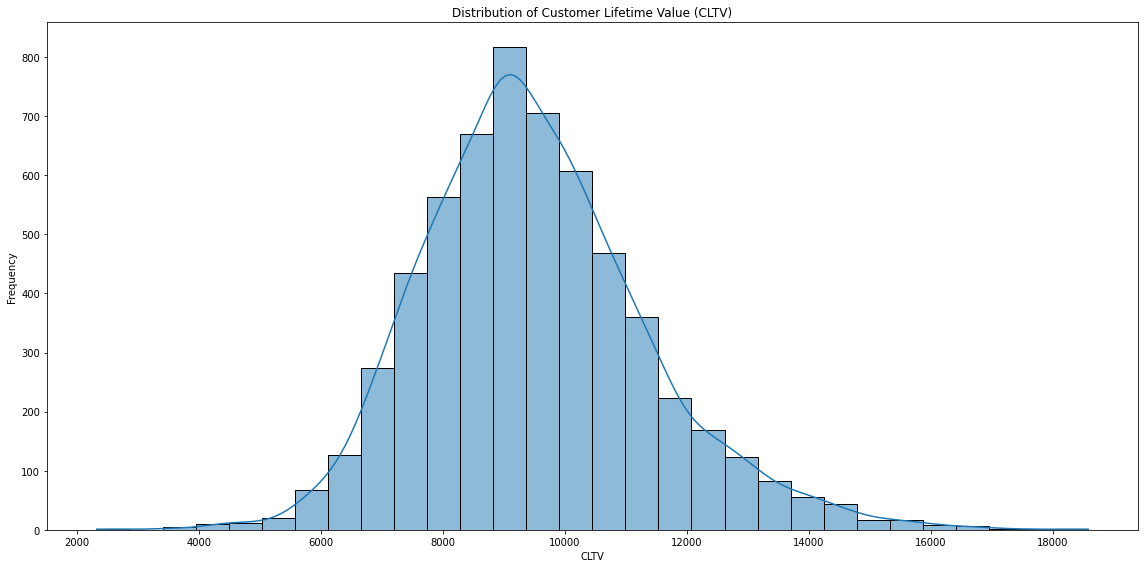

In [ ]:
pdf = df.toPandas()

# Convert Purchase column to numeric, forcing errors to NaN and then dropping them
pdf['Purchase'] = pd.to_numeric(pdf['Purchase'], errors='coerce')
pdf.dropna(subset=['Purchase'], inplace=True)

# Convert Pandas DataFrame to Spark DataFrame
sdf = spark.createDataFrame(pdf)

# Customer Lifetime Value (CLTV) Analysis
def cltv_analysis(sdf):
    cltv = sdf.groupBy("User_ID").agg(
        _sum("Purchase").alias("Total_Spent"),
        _count("Purchase").alias("Total_Transactions")
    )
    cltv = cltv.withColumn("CLTV", col("Total_Spent") / col("Total_Transactions"))
    cltv_sorted = cltv.orderBy(col("CLTV").desc())
    
    return cltv_sorted

cltv_sorted = cltv_analysis(sdf)

# Convert to Pandas for visualization
cltv_sorted_pd = cltv_sorted.toPandas()

# Plot the CLTV distribution
def plot_cltv(cltv_sorted_pd):
    plt.figure(figsize=(16, 8))

    sns.histplot(cltv_sorted_pd['CLTV'], bins=30, kde=True)
    plt.title('Distribution of Customer Lifetime Value (CLTV)')
    plt.xlabel('CLTV')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_cltv(cltv_sorted_pd)

***Inferences:***

a. High CLTV customers are valuable and should be targeted for loyalty programs.

b. Low CLTV might indicate the need for customer retention strategies.

c. If certain segments of customers show higher CLTV, tailor loyalty programs and personalized offers for these segments to enhance retention.

d. Analyze why other segments have lower CLTV and address any underlying issues.

**5. Customer Retention and Loyalty Analysis**

Usefulness: Analyzes the purchasing behavior of repeat customers.

Importance: Identifies loyal customers, helps in understanding retention patterns, and supports the development of strategies to increase customer loyalty, such as personalized offers and rewards programs.

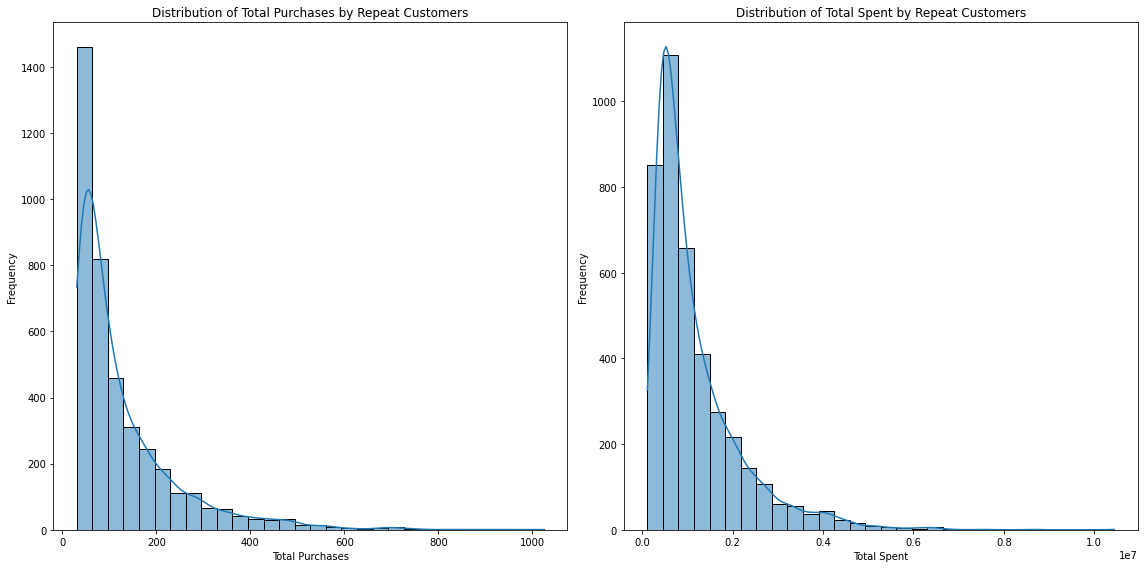

In [ ]:
# Customer Retention and Loyalty Analysis
def customer_retention_loyalty(sdf):
    # Identify repeat customers
    repeat_customers = sdf.groupBy("User_ID").agg(
        _count("Purchase").alias("Total_Purchases")
    ).filter(col("Total_Purchases") > 30)
    
    # Get statistics for repeat customers
    repeat_customers_stats = sdf.join(repeat_customers, "User_ID").groupBy("User_ID").agg(
        mean("Purchase").alias("Avg_Purchase"),
        spark_sum("Purchase").alias("Total_Spent")
    )
    
    return repeat_customers, repeat_customers_stats

repeat_customers, repeat_customers_stats = customer_retention_loyalty(sdf)

# Convert to Pandas for visualization
repeat_customers_pd = repeat_customers.toPandas()
repeat_customers_stats_pd = repeat_customers_stats.toPandas()

# Plot the results
def plot_customer_retention(repeat_customers_pd, repeat_customers_stats_pd):
    plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)
    sns.histplot(repeat_customers_pd['Total_Purchases'], bins=30, kde=True)
    plt.title('Distribution of Total Purchases by Repeat Customers')
    plt.xlabel('Total Purchases')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(repeat_customers_stats_pd['Total_Spent'], bins=30, kde=True)
    plt.title('Distribution of Total Spent by Repeat Customers')
    plt.xlabel('Total Spent')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_customer_retention(repeat_customers_pd, repeat_customers_stats_pd)

***Inferences:***

a. Repeat customers are more likely to contribute to sustained revenue.

b. Analyzing repeat customer behavior helps in understanding what drives loyalty.

c. High repeat purchase rates indicate strong customer satisfaction and product value.

d. Identify patterns among loyal customers to replicate these factors across other customer segments.

**6. Analysis of Product Category Combinations**

Usefulness: Identifies which product categories are frequently bought together.

Importance: Enhances cross-selling and upselling strategies, optimizes product placement and bundling in stores or online, and increases the average order value.

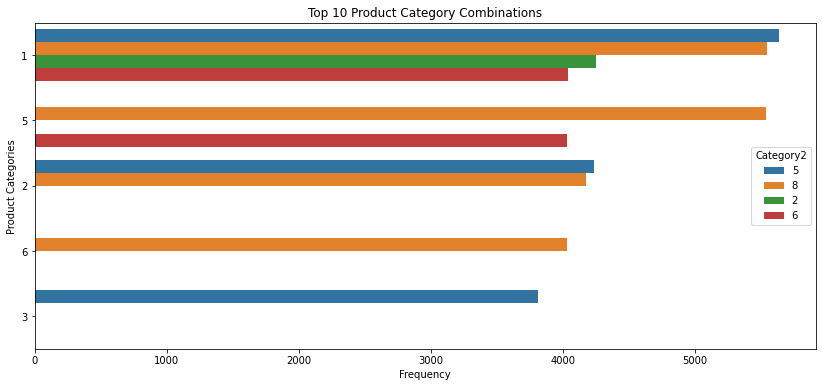

In [ ]:
from pyspark.sql.functions import collect_set, explode

# Aggregate product category combinations for each user
category_combinations = sdf.groupBy("User_ID").agg(collect_set("Product_Category_1").alias("Product_Categories"))

# Explode the product categories to create pair combinations
exploded = category_combinations.select("User_ID", explode("Product_Categories").alias("Category"))
combinations = exploded.alias("a").join(exploded.alias("b"), "User_ID").select("a.User_ID", col("a.Category").alias("Category1"), col("b.Category").alias("Category2")).filter(col("Category1") < col("Category2"))

# Calculate the frequency of each combination
combination_frequency = combinations.groupBy("Category1", "Category2").count().orderBy("count", ascending=False)

# Convert to Pandas for visualization
combination_frequency_pd = combination_frequency.toPandas()

# Plot the most frequent product category combinations
plt.figure(figsize=(14, 6))
sns.barplot(x='count', y='Category1', hue='Category2', data=combination_frequency_pd.head(10))
plt.title('Top 10 Product Category Combinations')
plt.xlabel('Frequency')
plt.ylabel('Product Categories')
plt.show()

***Inferences:***

a. Frequently bought together products can be bundled to increase average order value

b. Understanding product combinations helps in store layout optimization and recommendation systems.

c. If certain product categories are frequently bought together, create bundles or recommend these combinations on the website to increase sales.

d. Optimize physical store layouts to place these products in proximity to encourage combined purchases.

**7. Gender-Based Product Category Analysis**

Usefulness: Examines purchasing patterns based on gender.

Importance: Provides insights into gender-specific preferences, supports the creation of targeted marketing campaigns, and helps in tailoring product assortments to meet the preferences of different gender demographics.

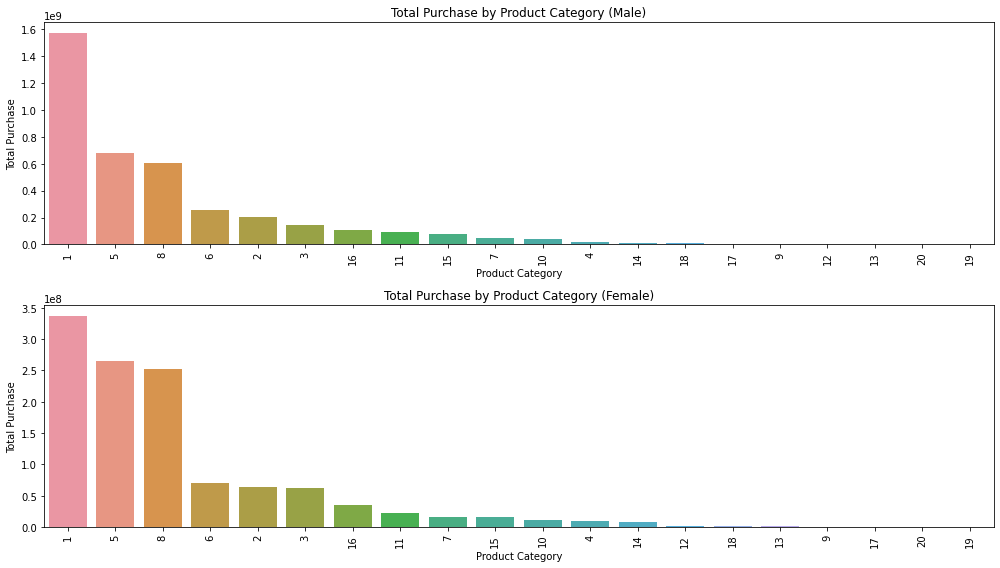

In [ ]:
# Perform Gender-Based Product Category Analysis using SparkSQL
gender_product_category_purchase_query = """
SELECT 
    Gender,
    Product_Category_1 AS Category,
    AVG(Purchase) AS Avg_Purchase,
    SUM(Purchase) AS Total_Purchase,
    COUNT(Purchase) AS Purchase_Count
FROM 
    sales_data
GROUP BY 
    Gender, Product_Category_1
ORDER BY 
    Gender, Total_Purchase DESC
"""

gender_product_category_purchase_df = spark.sql(gender_product_category_purchase_query)

# Convert to Pandas for visualization
gender_product_category_purchase_pd = gender_product_category_purchase_df.toPandas()

# Visualize the Results
plt.figure(figsize=(14, 8))

# Plot for Male
plt.subplot(2, 1, 1)
male_data = gender_product_category_purchase_pd[gender_product_category_purchase_pd['Gender'] == 'M']
sns.barplot(x='Category', y='Total_Purchase', data=male_data)
plt.title('Total Purchase by Product Category (Male)')
plt.xlabel('Product Category')
plt.ylabel('Total Purchase')
plt.xticks(rotation=90)

# Plot for Female
plt.subplot(2, 1, 2)
female_data = gender_product_category_purchase_pd[gender_product_category_purchase_pd['Gender'] == 'F']
sns.barplot(x='Category', y='Total_Purchase', data=female_data)
plt.title('Total Purchase by Product Category (Female)')
plt.xlabel('Product Category')
plt.ylabel('Total Purchase')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

***Inferences:***

a. Analyzing gender-specific purchasing patterns helps in customizing marketing strategies.

b. Product offerings can be tailored based on gender preferences.

c. If males or females show a higher average purchase in certain categories, customize the product assortments and marketing messages for these demographics.

d. Use the insights to drive targeted advertising campaigns on platforms where these gender demographics are most active.

**8. Multidimensional Scaling for Regional Product Category Analysis**

Usefulness: Visualizes the similarity of customer demographics and preferences across different product categories within various regions.

Importance: Enables precise identification of regional market trends, supports strategic decision-making in marketing and inventory allocation, and enhances understanding of the spatial distribution of customer preferences, aiding in the development of region-specific strategies.

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType
from pyspark.sql.functions import count, when, col
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import StringIndexer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import Row
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors,VectorUDT
from pyspark.ml.feature import StandardScaler, VectorAssembler
from sklearn.manifold import MDS
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import matplotlib.colors as mcolors
import plotly.express as px

In [ ]:
# Define the schema corresponding to the dataset structure
schema = StructType([
    StructField("User_ID", StringType(), True),
    StructField("Product_ID", StringType(), True),
    StructField("Gender", StringType(), True),
    StructField("Age", StringType(), True),
    StructField("Occupation", IntegerType(), True),
    StructField("City_Category", StringType(), True),
    StructField("Stay_In_Current_City_Years", StringType(), True),
    StructField("Marital_Status", IntegerType(), True),
    StructField("Product_Category_1", IntegerType(), True),
    StructField("Product_Category_2", IntegerType(), True),
    StructField("Product_Category_3", IntegerType(), True),
    StructField("Purchase", IntegerType(), True)
])
# Load the data with the defined schema
df = spark.read.csv("/FileStore/tables/train.csv", schema=schema, header=True)

# Remove duplicate rows if any
df = df.dropDuplicates()

# Drop the columns 'Product_Category_2' and 'Product_Category_3' as these are the only columns that have missing values
df = df.drop("Product_Category_2", "Product_Category_3")

# Maps for ordinal encoding
gender_map = {"F": 0, "M": 1}
stay_map = {"0": 0, "1": 1, "2": 2, "3": 3, "4+": 4}
age_map = {"0-17": 0, "18-25": 1, "26-35": 2, "36-45": 3, "46-50": 4, "51-55": 5, "55+": 6}

# UDFs to apply the mappings
gender_udf = udf(lambda x: gender_map[x], IntegerType())
stay_udf = udf(lambda x: stay_map[x], IntegerType())
age_udf = udf(lambda x: age_map[x], IntegerType())

df = df.withColumn("Gender_encoded", gender_udf(col("Gender")))
df = df.withColumn("Stay_In_Current_City_Years_encoded", stay_udf(col("Stay_In_Current_City_Years")))
df = df.withColumn("Age_encoded", age_udf(col("Age")))

# StringIndexer for nominal encoding
indexer = StringIndexer(inputCol="City_Category", outputCol="City_Category_Indexed")
df = indexer.fit(df).transform(df)

# Dropping the original columns before encoding
df = df.drop("Gender", "Stay_In_Current_City_Years", "Age", "City_Category")


**Applying PCA on customer demographics to bring the data to 2 dimensions for visualization purpose and to get some insights**

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pcaFeatures. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


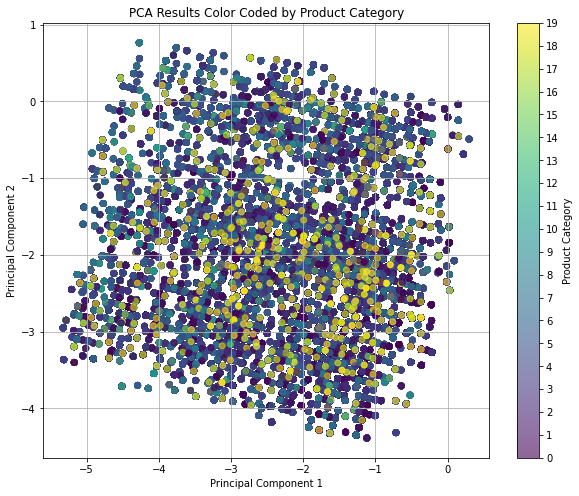

In [ ]:
# Assemble features for normalization
assembler = VectorAssembler(
    inputCols=[
        "Age_encoded",
        "City_Category_Indexed",
        "Gender_encoded",
        "Occupation",
        "Marital_Status",
        "Stay_In_Current_City_Years_encoded",
    ],
    outputCol="features",
)
assembled_df = assembler.transform(df)

# Apply StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)

# Applying PCA Algorithm
pca = PCA(k=2, inputCol="scaled_features", outputCol="pcaFeatures")
pca_model = pca.fit(scaled_df)
result = pca_model.transform(scaled_df).select("pcaFeatures")

# Select only the PCA features and convert to a Pandas DataFrame
pandas_df = result.select("pcaFeatures").toPandas()
pandas_df['pca_x'] = pandas_df['pcaFeatures'].apply(lambda x: x[0])
pandas_df['pca_y'] = pandas_df['pcaFeatures'].apply(lambda x: x[1])

category_df = df.select("Product_Category_1").toPandas()

# Convert Product_Category_1 to a categorical type if it isn't already
category_df['Product_Category_1'] = pd.Categorical(category_df['Product_Category_1'])

# Map categories to codes - this is numeric and can be used for coloring
pandas_df['category_color'] = category_df['Product_Category_1'].cat.codes

# Plotting the PCA results with respect to each product category
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pandas_df['pca_x'], pandas_df['pca_y'], c=pandas_df['category_color'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, ticks=range(len(category_df['Product_Category_1'].cat.categories)), label='Product Category')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results Color Coded by Product Category')
plt.grid(True)
plt.show()

**Inferences**

a. The PCA plot reveals a high degree of scatter with no visible clusters, indicating no discernible patterns based on product categories.

b. PCA is not able to provide actionable insights for this particular set of features in the dataset.


In [ ]:
from sklearn.preprocessing import StandardScaler

**Applying Multi-Dimensional-Scaling and plotting for each region seperately to find effective insights**

In [ ]:
# Function to apply Multi-Dimensional-Scaling and to visualize it
def generate_mds_for_each_region(df, city_category_index):
    # Filter the DataFrame based on City_Category_Indexed
    filtered_df = df.filter(F.col("City_Category_Indexed") == city_category_index)

    # Calculate frequencies and modes
    gender_freq = filtered_df.groupBy("Product_Category_1", "Gender_encoded").count().withColumnRenamed("count", "gender_freq")
    occupation_freq = filtered_df.groupBy("Product_Category_1", "Occupation").count().withColumnRenamed("count", "occupation_freq")
    marital_status_freq = filtered_df.groupBy("Product_Category_1", "Marital_Status").count().withColumnRenamed("count", "marital_status_freq")

    windowSpec = Window.partitionBy("Product_Category_1").orderBy(F.desc("gender_freq"))
    gender_mode = gender_freq.withColumn("rank", F.rank().over(windowSpec)).filter(F.col("rank") == 1).drop("rank")

    windowSpec = Window.partitionBy("Product_Category_1").orderBy(F.desc("occupation_freq"))
    occupation_mode = occupation_freq.withColumn("rank", F.rank().over(windowSpec)).filter(F.col("rank") == 1).drop("rank")

    windowSpec = Window.partitionBy("Product_Category_1").orderBy(F.desc("marital_status_freq"))
    marital_status_mode = marital_status_freq.withColumn("rank", F.rank().over(windowSpec)).filter(F.col("rank") == 1).drop("rank")

    aggregated_data = filtered_df.groupBy("Product_Category_1").agg(
        F.avg("Purchase").alias("avg_purchase_value"),
        F.countDistinct("User_ID").alias("unique_customers"),
        F.countDistinct("Product_ID").alias("product_diversity"),
        F.avg("Age_encoded").alias("average_age"),
        F.avg("City_Category_Indexed").alias("avg_city_category")
    )

    # Join mode data back to aggregated data
    aggregated_data = aggregated_data.join(gender_mode, ["Product_Category_1"], "left")
    aggregated_data = aggregated_data.join(occupation_mode, ["Product_Category_1"], "left")
    aggregated_data = aggregated_data.join(marital_status_mode, ["Product_Category_1"], "left")

    # Convert to Pandas DataFrame
    aggregated_data_pd = aggregated_data.toPandas()

    # Copying data for plotting
    plotting_data = aggregated_data_pd[['Product_Category_1', 'avg_purchase_value', 'unique_customers']].copy()

    # Scaling all remaining columns
    scaler = StandardScaler()
    aggregated_data_pd[aggregated_data_pd.columns] = scaler.fit_transform(aggregated_data_pd)

    # Initialize MDS
    mds = MDS(n_components=2, random_state=42)
    mds_results = mds.fit_transform(aggregated_data_pd.drop(['Product_Category_1'], axis=1))  # Exclude non-numeric columns

    # Add MDS results to the DataFrame
    aggregated_data_pd['mds_x'] = mds_results[:, 0]
    aggregated_data_pd['mds_y'] = mds_results[:, 1]

    # Add plotting data back
    aggregated_data_pd["Actual_Product_Category_1"] = plotting_data["Product_Category_1"]
    aggregated_data_pd["Actual_avg_purchase_value"] = plotting_data["avg_purchase_value"]
    aggregated_data_pd["Actual_unique_customers"] = plotting_data["unique_customers"]

    # Create an interactive scatter plot
    fig = px.scatter(
        aggregated_data_pd,
        x='mds_x',
        y='mds_y',
        color='Actual_avg_purchase_value',
        size='Actual_unique_customers',
        hover_name='Actual_Product_Category_1',
        labels={"Actual_avg_purchase_value": "Revenue", "Actual_unique_customers": "Customer Count"},
        title=f"Interactive MDS of Product Categories for Region { int(city_category_index)}",
        color_continuous_scale=px.colors.sequential.Viridis,
        size_max=25
    )

    # Enhance the color bar layout
    fig.update_layout(coloraxis_colorbar={
        'title': "Total Revenue",
        'ticks': "outside",
        'tickvals': [aggregated_data_pd['Actual_avg_purchase_value'].min(), aggregated_data_pd['Actual_avg_purchase_value'].max()],
        'ticktext': ['Low', 'High']
    })

    # Show the figure
    fig.show()

In [ ]:
# Generating MDS for each product category for each city region
generate_mds_for_each_region(df, 0.0)
generate_mds_for_each_region(df, 1.0)
generate_mds_for_each_region(df, 2.0)

**Inferences**

a. The size of the bubble represents how many unique people are buying products from that category and it is changing for each region. Hence it can be used to determine the importance of each product category and then doing inventory management in each regions accordingly

b. Each regions unique product distribution can guide tailored marketing strategies, product placement, and inventory decisions to optimize local market engagement.

c. The color of each bubble represents how much revenue that product category is generating, so it can be used to identify high-performing product categories, prioritize resource allocation, and develop targeted promotions to maximize profitability in each region.

d. There are certain isolated product category like category 17 that means it has unique customer demographics distinct from the majority. So we can do some targeted marketing on those unique customers for that unique product category.

### Conclusion

1. Data Loading and Cleaning: Successfully loaded the Black Friday Sales dataset into a Pandas DataFrame.
Handled missing values and ensured data consistency, particularly in the Purchase column.

2. Exploratory Data Analysis (EDA): Performed EDA to understand the distribution and characteristics of the dataset.
Generated descriptive statistics and visualizations to uncover key patterns and insights.

3. Business Insights Derived: 

          a. Average Purchase Amount by Product Category: Identified high-value product categories.
          
          b. Analysis of Product Popularity Across Different Age Groups: Determined product preferences among different age groups.
          
          c. Product Performance and Inventory Management: Assessed top-performing and underperforming products.
          
          d. Customer Lifetime Value (CLTV) Analysis: Calculated CLTV to identify high-value customers.
          
          e. Customer Retention and Loyalty Analysis: Analyzed repeat customer behavior.
          
          f. Analysis of Product Category Combinations: Identified frequently bought together product combinations.
          
          g. Gender-Based Product Category Analysis: Examined purchasing patterns based on gender.

4. Visualization: Created various plots using Matplotlib and Seaborn to visualize insights effectively.
Compared purchase behaviors across different segments and categories.

5. Multidimensional scaling highlights regional variations in customer engagement and product performance, providing actionable insights for customized inventory management, marketing strategies, and targeted promotions to enhance profitability and customer satisfaction across diverse market segments.